In [1]:
%run ../../utils/commonImports.py
%matplotlib inline

# Load Data

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split('D:\\Dropbox\\My work\\krypl-project\\dataSplit\\01-priceMovement')

# Test Train Validation Split

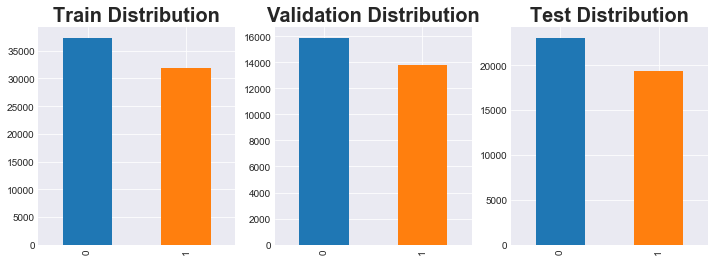

In [3]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font);

In [4]:
X_train.describe()

,return,return_1,return_2,zscore_36_return,zscore_288_return,zscore_36_volume,zscore_288_volume,zscore_2016_volume,pma36,pma288,...,vma2016,ma_12_108,ma_36_288,ac36,ac288,vol36,vol288,vol2016,dv_36_288,dv_288_2016
count,"69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000",...,"69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000"
mean,0.0000,0.0000,0.0000,-0.0093,-0.0036,0.1425,0.0326,0.0384,-0.0048,-0.0057,...,0.0282,-0.0111,-0.0062,-0.0097,0.0254,-0.0033,-0.1425,-0.1067,0.0678,-0.0704
std,0.0034,0.0034,0.0033,1.1263,1.0463,2.6198,1.3110,1.1613,1.1110,1.3870,...,1.3071,1.2342,1.4351,1.1815,1.7025,1.2577,1.6324,1.7139,1.2587,1.6325
min,-0.0806,-0.0806,-0.0806,-20.9328,-23.7536,-2.1624,-1.5677,-1.2240,-14.3554,-12.2474,...,-1.5447,-9.6037,-9.1239,-8.3615,-5.3630,-6.0729,-19.4854,-20.0578,-5.9688,-9.5976
25%,-0.0012,-0.0012,-0.0012,-0.5076,-0.4485,-0.5751,-0.4574,-0.3996,-0.6050,-0.9632,...,-0.4587,-0.7346,-1.0082,-0.6853,-1.5292,-0.8328,-1.4259,-1.4800,-0.7835,-1.3772
50%,0.0000,0.0000,0.0000,-0.0017,-0.0037,-0.3378,-0.2894,-0.2672,0.0217,0.0174,...,-0.2911,-0.0094,0.0049,-0.0041,0.0510,-0.2145,-0.3654,-0.3661,-0.1548,-0.1903
75%,0.0013,0.0013,0.0013,0.5199,0.4750,0.2120,0.0906,0.0739,0.6153,0.9627,...,0.0838,0.7244,1.0040,0.6723,1.5667,0.6365,1.2102,1.3643,0.7361,1.2583
max,0.0624,0.0742,0.0576,25.7906,22.6807,335.8571,89.1151,65.5707,12.7679,11.7686,...,84.2282,8.4523,8.4980,6.9211,4.7566,23.7206,23.2474,19.2907,17.5481,26.5277


# Decision Tree

In [5]:
import time
from modeling.gridsearch import GridSearch
from sklearn.tree import DecisionTreeClassifier

params_to_train = {
    'max_depth': [5, 8, 10, 12, 15, 18, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 30, 50],
    'class_weight': ['balanced']
}

grid_search = GridSearch(DecisionTreeClassifier, params_to_train)
grid_search.fit_all(X_train, y_train)

path = "D:\\Dropbox\\My work\\krypl-project\\models\\01-priceMovement"
save_model(grid_search, f'{path}\\tree_search.pkl');

train [0/55] {'max_depth': 5, 'min_samples_split': 2, 'class_weight': 'balanced'}........................... 1.77 sec
train [1/55] {'max_depth': 5, 'min_samples_split': 5, 'class_weight': 'balanced'}........................... 1.39 sec
train [2/55] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 1.73 sec
train [3/55] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': 'balanced'}........................... 1.50 sec
train [4/55] {'max_depth': 5, 'min_samples_split': 50, 'class_weight': 'balanced'}........................... 1.54 sec
train [5/55] {'max_depth': 8, 'min_samples_split': 2, 'class_weight': 'balanced'}........................... 2.13 sec
train [6/55] {'max_depth': 8, 'min_samples_split': 5, 'class_weight': 'balanced'}........................... 2.21 sec
train [7/55] {'max_depth': 8, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 2.11 sec
train [8/55] {'max_depth': 8, 'min_samples_split': 3